## 1) Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns
sns.set(color_codes = True)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as statm

from sklearn.model_selection import train_test_split

#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image 

#import pydotplus as pydot
from sklearn import tree
from os import system

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

## 2) Reading the data as a data frame

In [2]:
pk_data = pd.read_csv("parkinsons.csv")

## 3) Data Analysis and Preparation

### a) Displaying the head and tail of the dataset

In [3]:
pk_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
pk_data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


### b) Shape of the data

In [5]:
print(pk_data.columns)
print(pk_data.shape)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
(195, 24)


***- We have 23 independent variables and 1 dependent variable i.e. ‘status’ in the data set. Also, we got 195 rows which can be split into test & train datasets.***

### c) Data type of each attribute

In [6]:
pk_data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

***- Almost all atributes are numeric except name.***

### d) Checking Null or Empty Values (Data Cleaning)

In [7]:
pk_data.info() # checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
pk_data.isna().apply(pd.value_counts) # checking missing value

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
False,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195


In [9]:
val = pk_data.isnull().values.any()

if val == True:
    print("Missing values present : ", pk_data.isnull().values.sum())
    pk_data = pk_data.dropna()
else:
    print("No missing values present")

No missing values present


### e) Summary Statistics

In [10]:
pk_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


### f) Measuring skewness

In [11]:
pk_data.skew(axis = 0, skipna = True)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

### g) Bi-variate distribution

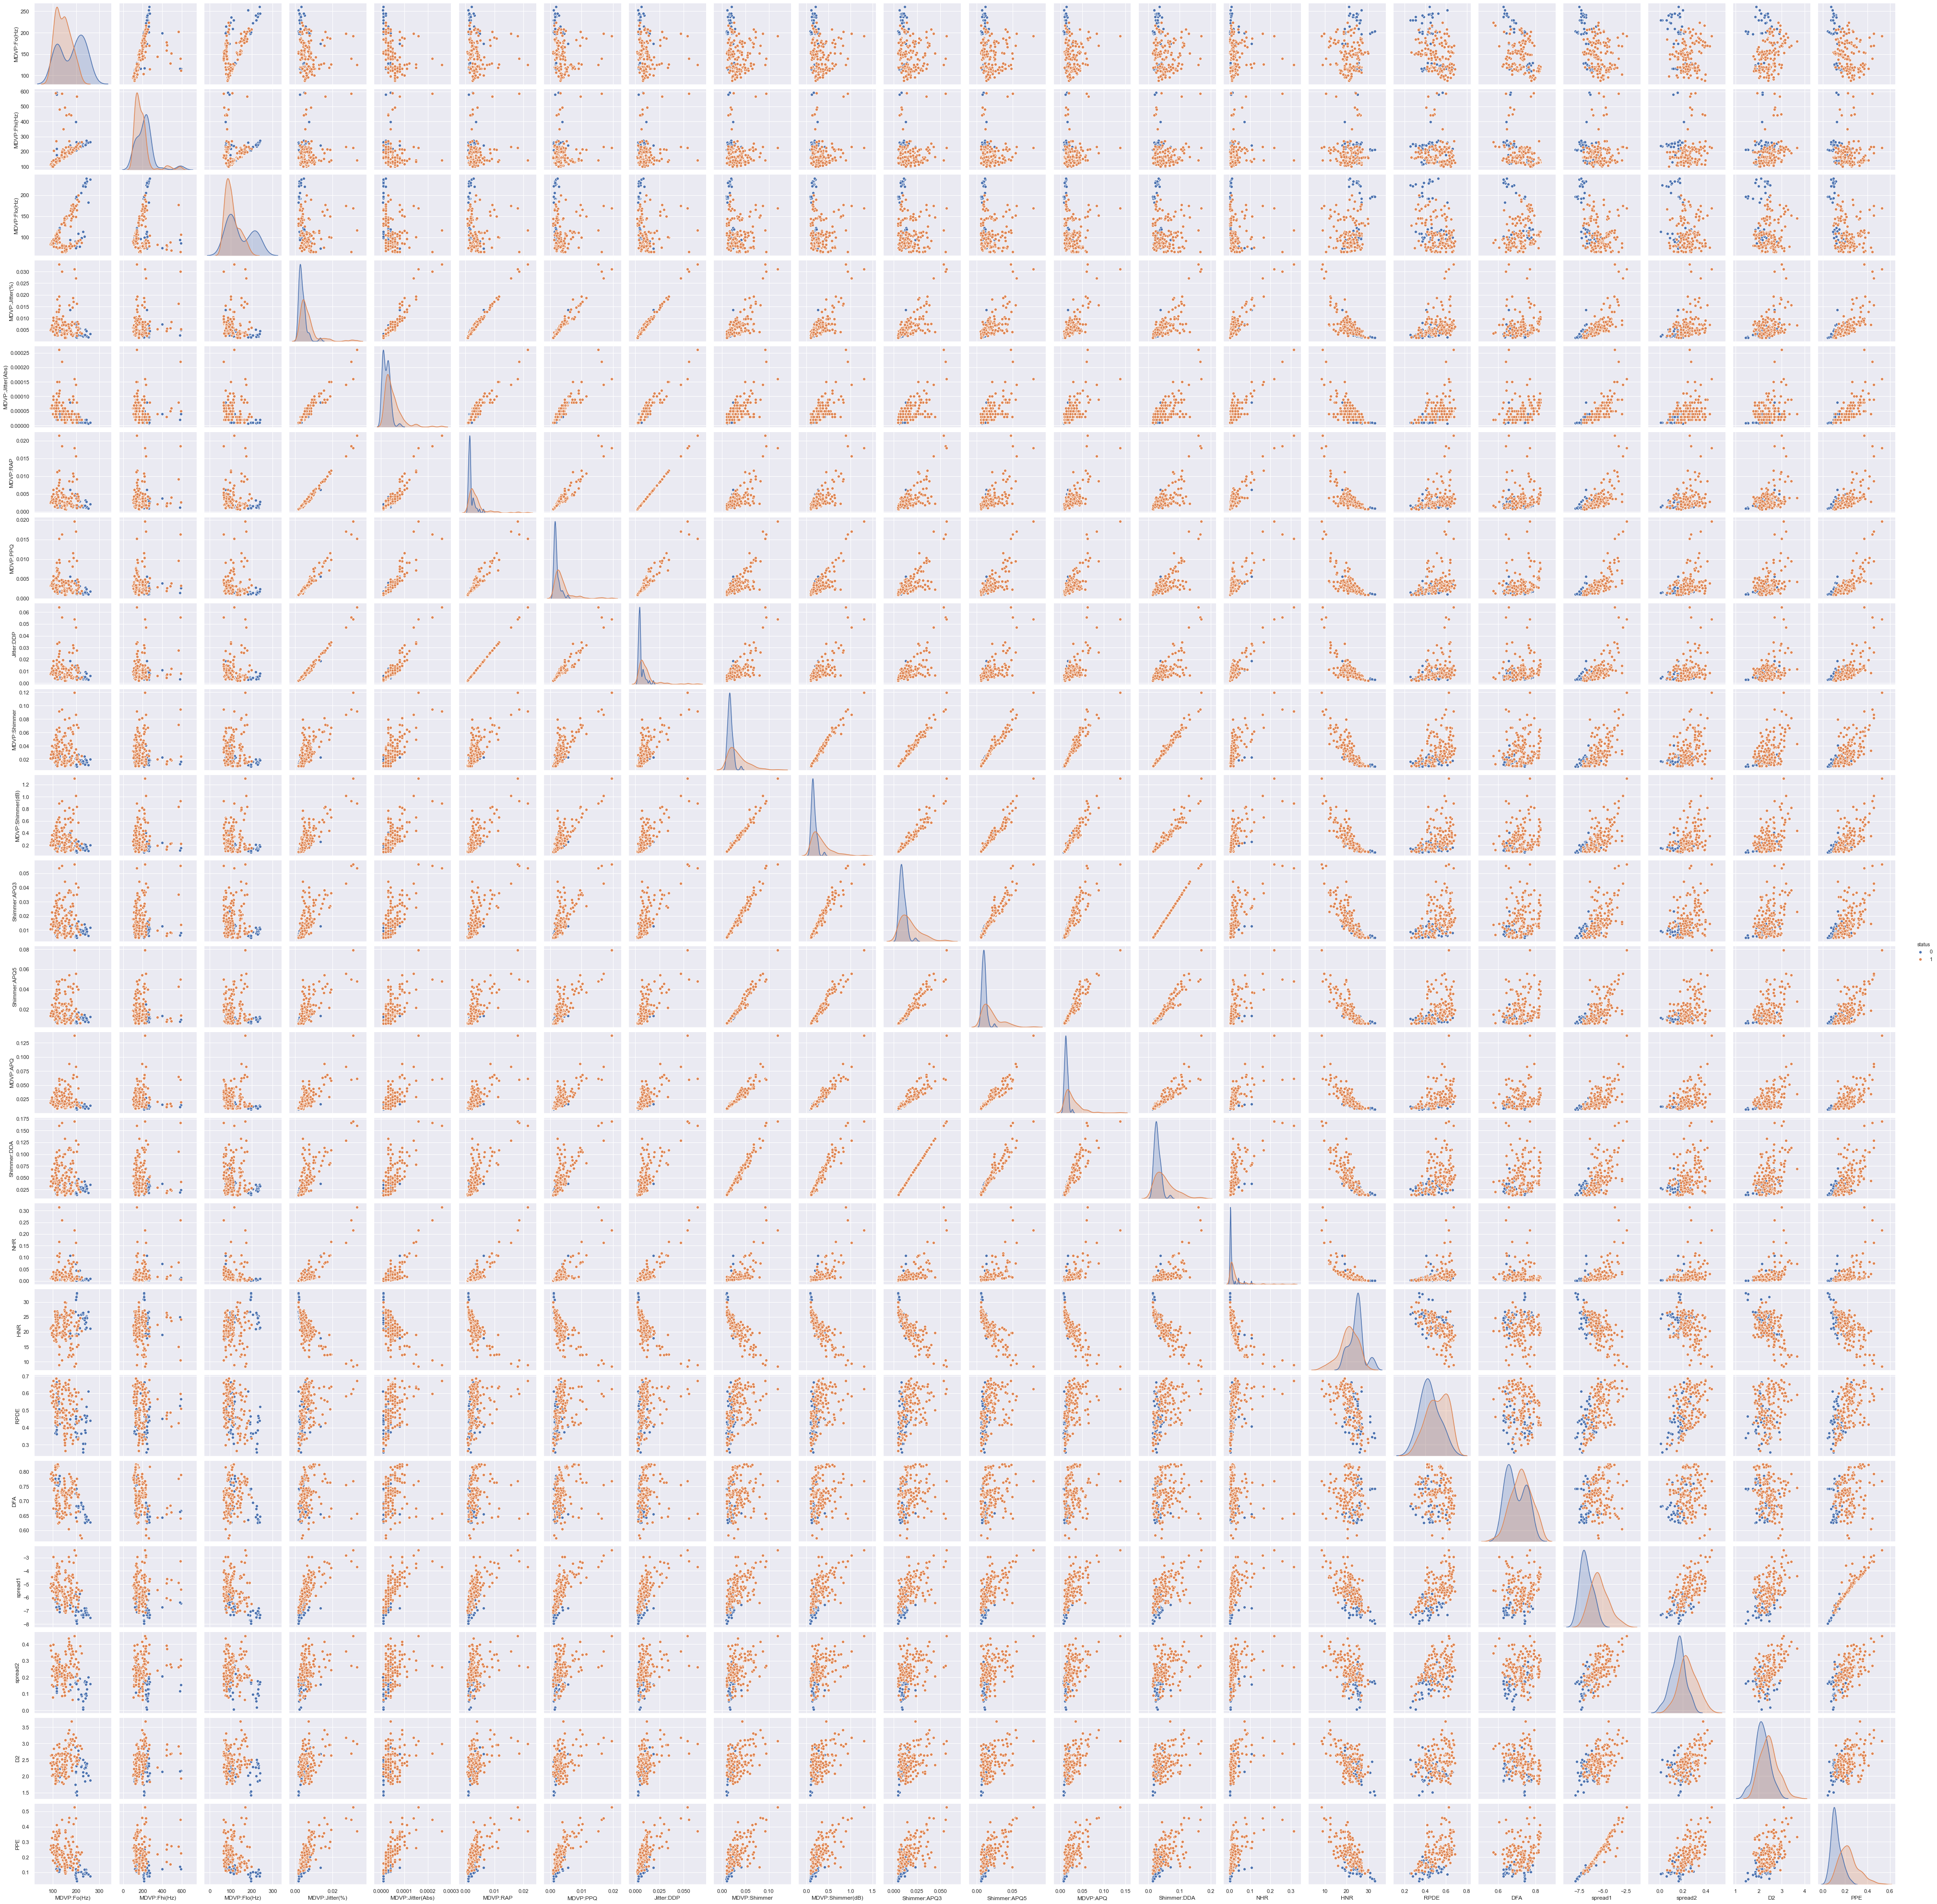

In [12]:
sns.pairplot(pk_data, diag_kind='kde',hue = "status")
plt.show()

### h) Correlation

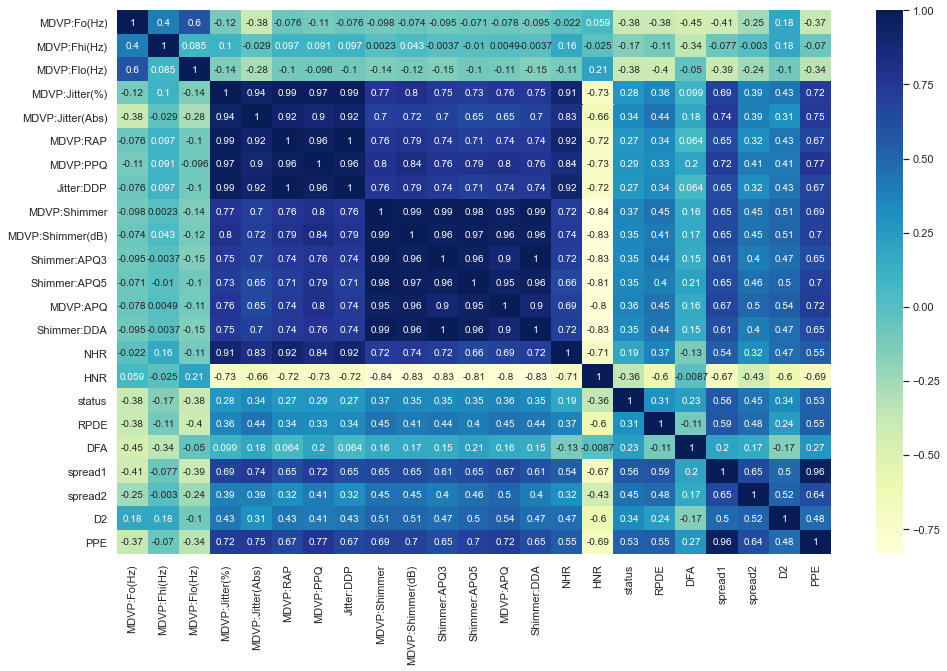

In [13]:
corr = pk_data.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap = "YlGnBu")
plt.show()

In [14]:
# correlation coefficient values in each attributes.
correlation_values=pk_data.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

***- Above is the correlation values in descending order, we have correaltion values in each attribute so we are going to drop from MDVP:RAP column to MDVP:Fhi(Hz) because it have less correlation with other columns.***

***- If we decrease the column count then accuracy will increase gradually because we are not keeping the irrelevant features.***

## 3) Distribution of target column 

In [15]:
pk_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

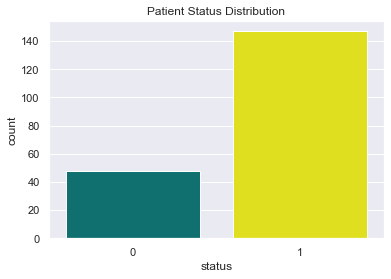

In [16]:
colors = ['teal', 'yellow']

plt.title('Patient Status Distribution')
sns.countplot(x = 'status', data = pk_data, palette = colors)
plt.show()

## 4) Spliting the data 
**We will use 70% of data for training and 30% for testing.**

***We are going to drop irrelavant column values from our dataset so that we can get better accuracy.***

In [17]:
cols = ['MDVP:RAP','Jitter:DDP','DFA','NHR','MDVP:Fhi(Hz)','name','status']
X = pk_data.drop(cols , axis = 1)
Y = pk_data['status']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

x_train.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,RPDE,spread1,spread2,D2,PPE
42,237.226,225.227,0.00298,0.00001,0.00182,0.01752,0.164,0.01035,0.01024,0.01133,0.03104,22.736,0.305062,-7.310550,0.098648,2.416838,0.095032
17,168.778,75.603,0.00718,0.00004,0.00387,0.03327,0.348,0.01441,0.01893,0.03430,0.04322,20.376,0.631099,-2.931070,0.434326,3.007463,0.430788
5,120.552,113.787,0.00968,0.00008,0.00750,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,21.378,0.415564,-4.242867,0.299111,2.187560,0.357775
120,128.940,88.251,0.00581,0.00005,0.00314,0.02008,0.221,0.00849,0.01117,0.01734,0.02548,24.743,0.487756,-6.186128,0.279933,2.686240,0.152428
98,125.791,96.206,0.01378,0.00011,0.00655,0.04689,0.422,0.02542,0.02630,0.03908,0.07625,15.433,0.571010,-5.159169,0.202146,2.441612,0.260375


### Lets check split of data

In [18]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pk_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pk_data.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [19]:
print("Original status True Values    : {0} ({1:0.2f}%)".format(len(pk_data.loc[pk_data['status'] == 1]), (len(pk_data.loc[pk_data['status'] == 1])/len(pk_data.index)) * 100))
print("Original status False Values   : {0} ({1:0.2f}%)".format(len(pk_data.loc[pk_data['status'] == 0]), (len(pk_data.loc[pk_data['status'] == 0])/len(pk_data.index)) * 100))
print("")
print("Training status True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training status False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test status True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test status False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original status True Values    : 147 (75.38%)
Original status False Values   : 48 (24.62%)

Training status True Values    : 107 (78.68%)
Training status False Values   : 29 (21.32%)

Test status True Values        : 40 (67.80%)
Test status False Values       : 19 (32.20%)



# 5) Classification models  

## a) Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train
LogReg = LogisticRegression(solver="liblinear")
LogReg.fit(x_train, y_train)

#predict on test
y_predict = LogReg.predict(x_test)


coef_df = pd.DataFrame(LogReg.coef_)
coef_df['intercept'] = LogReg.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.012963 -0.001277  0.007514  0.000066  0.006545  0.110842  1.049269   

          7         8         9        10        11        12        13  \
0  0.059919  0.067636  0.086584  0.179732  0.081816  0.532975  0.952267   

         14        15       16  intercept  
0  0.445514  2.576737  0.56189   0.754803  


In [21]:
LogReg_score = LogReg.score(x_test, y_test)
print("Accuracy : %f" % LogReg_score)

Accuracy : 0.796610


### Evaluate Performance of Logistic Regression Model

### Classification Report and Confusion Matrix 

              precision    recall  f1-score   support

           0       0.82      0.47      0.60        19
           1       0.79      0.95      0.86        40

    accuracy                           0.80        59
   macro avg       0.80      0.71      0.73        59
weighted avg       0.80      0.80      0.78        59



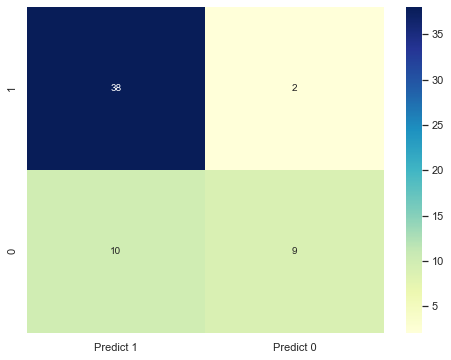

In [22]:
# Classification Report
print(classification_report(y_test, y_predict)) 

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu', fmt='g')

### Area under the ROC curvre

In [23]:
logR_curve = LogReg.predict_proba(x_test)

fpr1, tpr1, threshold1 = roc_curve(y_test, logR_curve[:,1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curvre : %f" % roc_auc1)

Area under the ROC curvre : 0.871053


### Observations :

***1) Here we got around 80% accuracy but we know from the data that the number of patient's percentage to the non-patient percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed.***

***2) We got a recall for ‘1’ which in this case is 95%, So out of the total number of patients who actually diagnosed with the disease, our model is able to pick 95% of patients of them to be correctly predicted.***

***3) The area under roc curve determines how our model performs. In this case, the area comes out to be around 87% which is good.***

## 6) Lets try to get more accurate results with scaled data

In [24]:
from sklearn import preprocessing

column_names = pk_data.columns   #get the column names
scaler = preprocessing.StandardScaler()    #create the scaler object
scaled_x_train = scaler.fit_transform(x_train)     #fit the data into scaler object
scaled_x_test = scaler.fit_transform(x_test)

In [25]:
sc_LogReg = LogisticRegression(solver="liblinear")
sc_LogReg.fit(scaled_x_train, y_train)

#predict on test
sc_y_predict = sc_LogReg.predict(scaled_x_test)

coef_df = pd.DataFrame(sc_LogReg.coef_)
coef_df['intercept'] = sc_LogReg.intercept_
print(coef_df)

          0         1         2        3        4         5         6  \
0 -0.707124 -0.061265 -0.430197 -0.47684 -0.14721  0.219012  0.149935   

          7         8         9        10        11        12        13  \
0  0.160429  0.086594  0.126954  0.159773 -0.076532 -0.345037  0.994915   

         14        15        16  intercept  
0  0.149872  0.880629  0.769324   2.253886  


In [26]:
sc_LogReg_score = sc_LogReg.score(scaled_x_train, y_train)
print("Accuracy : %f" % sc_LogReg_score)

Accuracy : 0.889706


              precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.81      0.97      0.89        40

    accuracy                           0.83        59
   macro avg       0.86      0.75      0.78        59
weighted avg       0.84      0.83      0.82        59



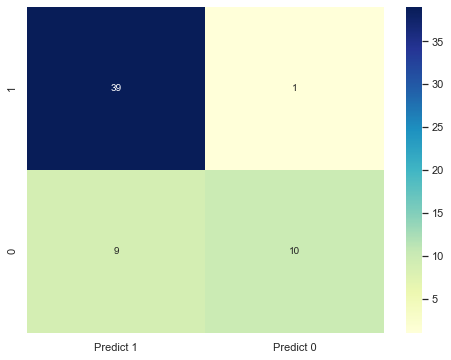

In [27]:
# Classification Report
print(classification_report(y_test, sc_y_predict)) 

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, sc_y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu', fmt='g')

### Area under the ROC curvre

In [28]:
sc_logR_curve = sc_LogReg.predict_proba(scaled_x_test)

sc_fpr1, sc_tpr11, sc_threshold1 = roc_curve(y_test, sc_logR_curve[:,1])
sc_roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curvre : %f" % sc_roc_auc1)

Area under the ROC curvre : 0.871053


### Observations :

***1) Here we are with around 89% accuracy and the recall value is 97% which means our model did better in predicting True Positives with scaled data.***

***2) Also, the area under the curve is around 87%, which is same as previous value.***

## b) kNN Model

In [29]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
sc_neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in sc_neighbors:
    sc_kNN = KNeighborsClassifier(n_neighbors=k)
    sc_kNN.fit(scaled_x_train, y_train)
    
    # predict the response
    sc_y_pred = sc_kNN.predict(scaled_x_test)
    
    # evaluate accuracy
    scores = accuracy_score(y_test, sc_y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
sc_optimal_k = sc_neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % sc_optimal_k)

The optimal number of neighbors is 1


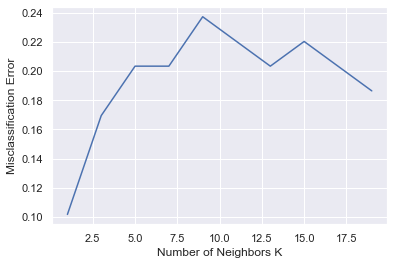

In [30]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(sc_neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [31]:
#Use k=1 as the final model for prediction
sc_kNN = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
sc_kNN.fit(scaled_x_train, y_train)

# predict the response
sc_y_pred = sc_kNN.predict(scaled_x_test)
sc_y_p = sc_kNN.predict(scaled_x_train)

# evaluate accuracy
print("Accuracy : %f" % accuracy_score(y_test, sc_y_pred))

Accuracy : 0.898305


### Evaluate Performance of kNN Model

### Classification Report and Confusion Matrix 

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.90      0.95      0.93        40

    accuracy                           0.90        59
   macro avg       0.89      0.87      0.88        59
weighted avg       0.90      0.90      0.90        59



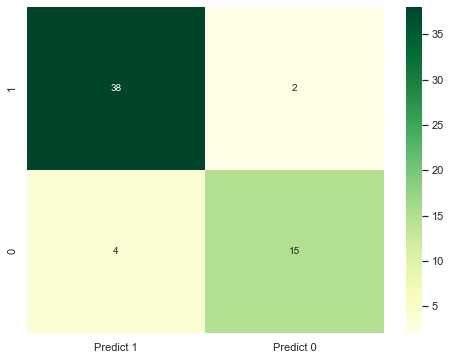

In [32]:
# Classification Report
print(classification_report(y_test, sc_y_pred)) 

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, sc_y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, cmap='YlGn', fmt='g')

### Area under the ROC curvre

In [33]:
sc_kNN_curve = sc_kNN.predict_proba(scaled_x_test)

sc_fpr2, sc_tpr2, sc_threshold2 = roc_curve(y_test, sc_kNN_curve[:,1])
sc_roc_auc2 = auc(sc_fpr2, sc_tpr2)
print("Area under the ROC curvre : %f" % sc_roc_auc2)

Area under the ROC curvre : 0.869737


### Observations :

***1) Here we are with around 90% accuracy to diagnose the patient with Parkinson's. Also, the recall value is 95% which is good.***

***2) Also, the area under the curve is around 92%, which is fairly good than previous.***

 ## c) Naive Bayes algorithm 

In [34]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
NB = GaussianNB()

NB.fit(scaled_x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Performance of Naive Bayes model with training data

In [35]:
NB_predict = NB.predict(scaled_x_train)

from sklearn import metrics

print("Model Accuracy with training data: {0:.4f}".format(metrics.accuracy_score(y_train, NB_predict)))
print()

Model Accuracy with training data: 0.7206



### Performance of Naive Bayes model with testing data

In [36]:
NB_test_predict = NB.predict(scaled_x_test)

from sklearn import metrics

print("Model Accuracy with testing data: {0:.4f}".format(metrics.accuracy_score(y_test, NB_test_predict)))
print()

Model Accuracy with testing data: 0.6949



### Evaluate Performance of Naive Bayes Model

### Classification Report and Confusion Matrix 

              precision    recall  f1-score   support

           0       0.52      0.74      0.61        19
           1       0.84      0.68      0.75        40

    accuracy                           0.69        59
   macro avg       0.68      0.71      0.68        59
weighted avg       0.74      0.69      0.70        59



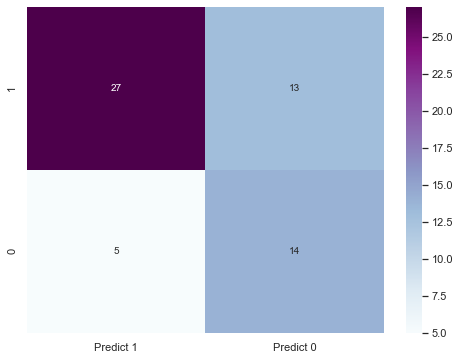

In [37]:
# Classification Report
print(classification_report(y_test, NB_test_predict)) 

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, NB_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, cmap='BuPu', fmt='g')

### Area under the ROC curvre

In [38]:
NB_curve = NB.predict_proba(scaled_x_test)

fpr3, tpr3, threshold3 = roc_curve(y_test, NB_curve[:,1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curvre : %f" % roc_auc3)

Area under the ROC curvre : 0.784211


### Observations :

***1) We got an accuracy score of around 70% with a recall value of 68% which is very less as compared to the kNN model and Logistic Regression models.***

***2) Also, the area under the curve is around 78%, which is also not as good as Logistic Regression and kNN model.***

# 7) meta-classifier

In [39]:
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier


clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, Y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.79 (+/- 0.04) [KNN]
Accuracy: 0.81 (+/- 0.05) [Random Forest]
Accuracy: 0.72 (+/- 0.02) [Naive Bayes]
Accuracy: 0.81 (+/- 0.05) [StackingClassifier]


# 8) Ensemble Learning

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [40]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(scaled_x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## Scoring our Decision Tree

In [41]:
print(dTree.score(scaled_x_train, y_train))
print(dTree.score(scaled_x_test, y_test))

1.0
0.7796610169491526


## Visualizing the Decision Tree

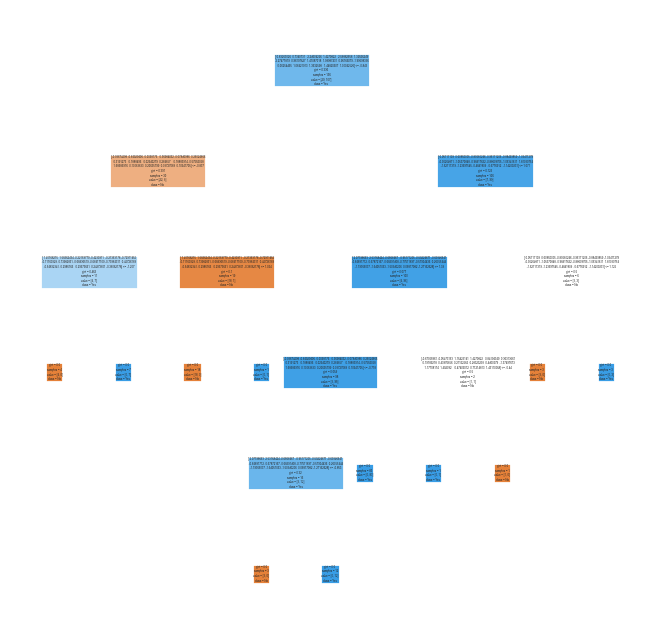

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(scaled_x_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=200)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

## Reducing over fitting (Regularization)

In [43]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(scaled_x_train, y_train)
print(dTreeR.score(scaled_x_train, y_train))
print(dTreeR.score(scaled_x_test, y_test))

0.9705882352941176
0.7627118644067796


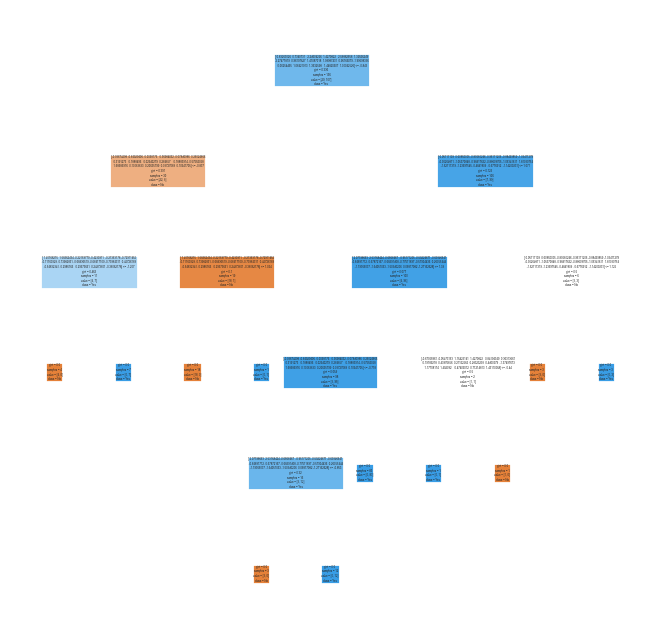

In [44]:
fn = list(scaled_x_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=200)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

0.7627118644067796
              precision    recall  f1-score   support

           0       0.73      0.42      0.53        19
           1       0.77      0.93      0.84        40

    accuracy                           0.76        59
   macro avg       0.75      0.67      0.69        59
weighted avg       0.76      0.76      0.74        59



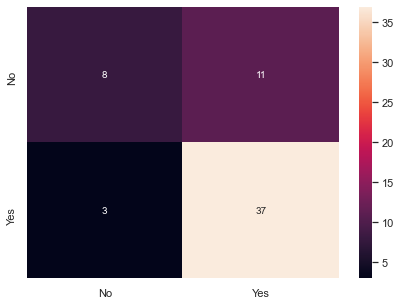

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dTreeR.score(scaled_x_test , y_test))
y_predict = dTreeR.predict(scaled_x_test)

# Classification Report
print(classification_report(y_test, y_predict)) 

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## a) Bagging

In [46]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(scaled_x_train, y_train)

0.7796610169491526
              precision    recall  f1-score   support

           0       0.88      0.37      0.52        19
           1       0.76      0.97      0.86        40

    accuracy                           0.78        59
   macro avg       0.82      0.67      0.69        59
weighted avg       0.80      0.78      0.75        59



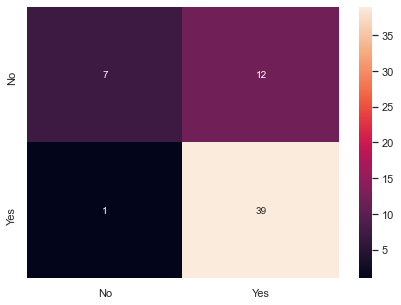

In [47]:
y_predict = bgcl.predict(scaled_x_test)

print(bgcl.score(scaled_x_test , y_test))

# Classification Report
print(classification_report(y_test, y_predict)) 

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Observations :

***1) Here we are with around 80% accuracy to diagnose the patient with Parkinson's. Also, the recall value is 97% which is good.***

## b) AdaBoosting

In [48]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(scaled_x_train, y_train)

0.8305084745762712
              precision    recall  f1-score   support

           0       0.85      0.58      0.69        19
           1       0.83      0.95      0.88        40

    accuracy                           0.83        59
   macro avg       0.84      0.76      0.79        59
weighted avg       0.83      0.83      0.82        59



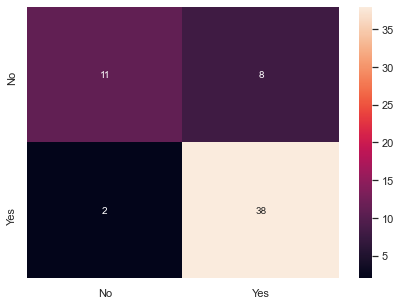

In [49]:
y_predict = abcl.predict(scaled_x_test)
print(abcl.score(scaled_x_test , y_test))

# Classification Report
print(classification_report(y_test, y_predict)) ### Observations :

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Observations :

***1) Here we are with around 83% accuracy to diagnose the patient with Parkinson's. Also, the recall value is 95% which is good.***

## c) Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(scaled_x_train, y_train)

0.8135593220338984
              precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.80      0.97      0.88        40

    accuracy                           0.81        59
   macro avg       0.85      0.72      0.75        59
weighted avg       0.83      0.81      0.79        59



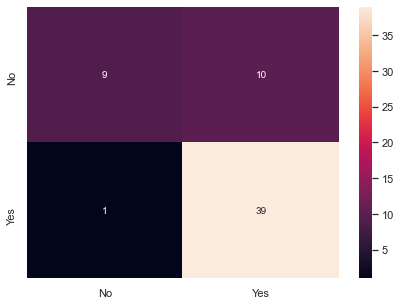

In [51]:
y_predict = rfcl.predict(scaled_x_test)
print(rfcl.score(scaled_x_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

# Classification Report
print(classification_report(y_test, y_predict)) 

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Observations :

***1) Here we are with around 81% accuracy to diagnose the patient with Parkinson's. Also, the recall value is 97% which is good.***

# 9) Model Comparison

In [52]:
plt.rcParams["figure.figsize"] = (20,10)
random_seed = 7

outcome = []
model_names = []
models = [('Logistic Regression', LogisticRegression()),
          ('GaussianNB', GaussianNB()),
          ('Bagging', BaggingClassifier()),
          ('AdaBoost',AdaBoostClassifier()),
          ('Random Forest', RandomForestClassifier())]

In [53]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, X, Y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s |  Mean=%f   | STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

Logistic Regression |  Mean=0.823421   | STD=0.220973
GaussianNB |  Mean=0.706053   | STD=0.204082
Bagging |  Mean=0.783421   | STD=0.192972
AdaBoost |  Mean=0.752105   | STD=0.182187
Random Forest |  Mean=0.767895   | STD=0.215091


**From the above, it looks like the Logistic Regression, Bagging and Random Forest methods are providing the best results (based on the ‘mean’ values).**

In [54]:
for model_name, model in models:
    model.fit(scaled_x_train, y_train)
    predictions = model.predict(scaled_x_test)
    print(model_name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

Logistic Regression
0.8305084745762712
              precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.81      0.97      0.89        40

    accuracy                           0.83        59
   macro avg       0.86      0.75      0.78        59
weighted avg       0.84      0.83      0.82        59

GaussianNB
0.6949152542372882
              precision    recall  f1-score   support

           0       0.52      0.74      0.61        19
           1       0.84      0.68      0.75        40

    accuracy                           0.69        59
   macro avg       0.68      0.71      0.68        59
weighted avg       0.74      0.69      0.70        59

Bagging
0.847457627118644
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.83      0.97      0.90        40

    accuracy                           0.85        59
   macro avg       0.87      0.78

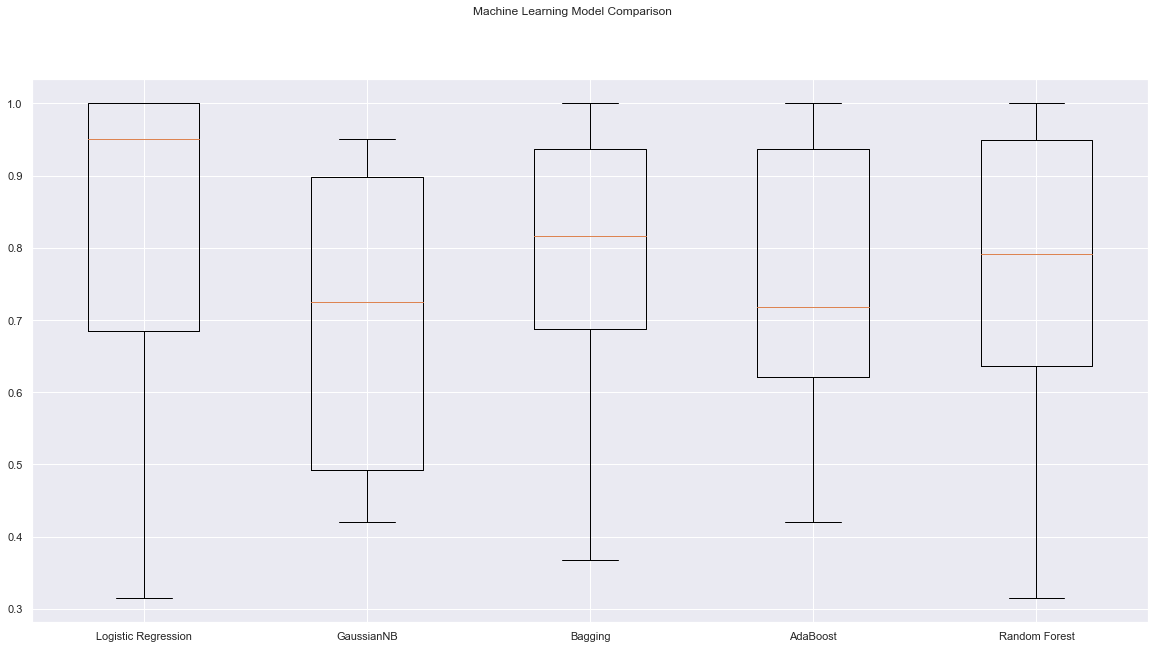

In [55]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

**Above plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.**

## Choosing the best model?

### From the above analysis, we can see the Logistic Regression(83% accuracy and 97% recall) and AdaBoost method(83% accuracy and 97% recall) are providing better results as compared other algorithms. We can choose both the methods as our final models.
